In [38]:
pip install pandas matplotlib seaborn statistics scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 150)
# pd.options.plotting.backend = "plotly"

In [4]:

df_44 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\44.csv")


df_44
list(df_44)

['Video Time',
 'Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal',
 'Pitch',
 'Yaw',
 'Roll',
 'Quality',
 'Mouth',
 'Left Eye',
 'Right Eye',
 'Left Eyebrow',
 'Right Eyebrow',
 'Gaze Direction',
 'Horizontal position',
 'Vertical position',
 'Depth position',
 'Horizontal gaze angle',
 'Vertical gaze angle',
 'Type',
 'Time',
 'Speed',
 'Traffic_volume',
 'Warning',
 'Gender',
 'Unnamed: 31',
 'average horizontal',
 'average vertical']

In [5]:
df_44= df_44[df_44["Valence"].str.contains("FIND_FAILED")==False]
df_44= df_44[df_44["Valence"].str.contains("FIT_FAILED")==False]
df_44= df_44[df_44["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

df_44

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Pitch,Yaw,Roll,Quality,Mouth,Left Eye,Right Eye,Left Eyebrow,Right Eyebrow,Gaze Direction,Horizontal position,Vertical position,Depth position,Horizontal gaze angle,Vertical gaze angle,Type,Time,Speed,Traffic_volume,Warning,Gender,Unnamed: 31,average horizontal,average vertical
0,01:12.0,0.9209794,0.06635344,0.04589145,0.002163734,0.01107026,0.02270168,0.01731,0.020462,0.3335958,13.98113,2.345486,-4.261234,0.6381086,Closed,Open,Open,Neutral,Neutral,Forward,-7.919467,48.38997,707.6608,9.494688,14.78506,Right,Night,45 mph,Light,RS,Male,NaN,-1.224834,51.484670
1,01:12.0,0.9228525,0.06506289,0.04384602,0.002096908,0.01131836,0.02147914,0.01745745,0.02121687,0.3329415,14.08681,2.139868,-4.319109,0.6327028,Closed,Open,Open,Neutral,Neutral,Forward,-9.453105,49.12967,708.1113,4.795661,15.29157,Right,Night,46 mph,Light,RS,Male,NaN,27.660606,46.563112
2,01:12.0,0.9251881,0.0660933,0.0417241,0.002190355,0.01088057,0.02000542,0.01985244,0.02436919,0.3322526,13.81242,2.031785,-4.456828,0.6266775,Closed,Open,Open,Neutral,Neutral,Left,-9.979665,48.61899,702.306,10.56143,17.01278,Right,Night,47 mph,Light,RS,Male,NaN,28.958804,43.216149
3,01:12.1,0.9255266,0.06483744,0.04370604,0.002183409,0.01019692,0.01846076,0.02658005,0.0211314,0.3314877,13.36858,2.296108,-4.712716,0.6290064,Closed,Open,Open,Neutral,Neutral,Forward,-10.65641,49.53471,702.4934,6.077894,13.77642,Right,Night,48 mph,Light,RS,Male,NaN,15.493976,41.537796
4,01:12.1,0.9292166,0.06284843,0.04318818,0.00209195,0.009502278,0.01722853,0.02584389,0.01966026,0.3306874,13.50923,1.772851,-3.298296,0.6238626,Closed,Open,Open,Neutral,Neutral,Forward,-12.12183,49.93031,701.975,5.204954,12.86595,Right,Night,49 mph,Light,RS,Male,NaN,27.869301,46.219582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,18:39.8,0.8384199,0.04381524,0.08271161,0.003094193,0.01235468,0.003266488,0.05762149,-0.03889638,0.3345347,15.55294,2.888622,-3.832582,0.5850389,Closed,Open,Open,Neutral,Neutral,Forward,-22.86269,28.9838,755.4469,5.784991,8.934913,Front,Night,40 mph,Heavy,RT,Male,NaN,NaN,NaN
726,18:39.8,0.8433182,0.04058025,0.08778106,0.003042714,0.01166683,0.003037927,0.05535869,-0.04720081,0.3345033,14.94078,3.009732,-3.958204,0.5710105,Closed,Open,Open,Neutral,Neutral,Forward,-22.82235,30.2412,746.3228,6.820365,8.829707,Front,Night,41 mph,Heavy,RT,Male,NaN,NaN,NaN
727,18:39.9,0.8414577,0.03808496,0.09288624,0.002980785,0.01136435,0.003101949,0.05239137,-0.05480128,0.3344729,15.18284,2.889127,-3.002918,0.5939699,Closed,Open,Open,Neutral,Neutral,Forward,-22.01466,33.10596,773.301,5.713867,8.99639,Front,Night,42 mph,Heavy,RT,Male,NaN,NaN,NaN
728,18:39.9,0.8451467,0.0351223,0.09595048,0.002968254,0.01088207,0.002932323,0.05199831,-0.06082819,0.3343441,15.09188,2.756359,-3.133921,0.5611975,Closed,Open,Open,Neutral,Neutral,Forward,-21.19976,31.95802,761.6451,6.85636,9.143853,Front,Night,43 mph,Heavy,RT,Male,NaN,NaN,NaN


In [249]:
YT=df_44.loc[df_44['Warning']=='YT']
YS=df_44.loc[df_44['Warning']=='YS']
RT=df_44.loc[df_44['Warning']=='RT']
RS=df_44.loc[df_44['Warning']=='RS']

In [253]:
YT_RH= df_44.loc[df_44['Type']=='Right']
YT_F=df_44.loc[df_44['Type']=='Front']
YT_F

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Pitch,Yaw,Roll,Quality,Mouth,Left Eye,Right Eye,Left Eyebrow,Right Eyebrow,Gaze Direction,Horizontal position,Vertical position,Depth position,Horizontal gaze angle,Vertical gaze angle,Type,Time,Speed,Traffic_volume,Warning,Gender,Unnamed: 31,average horizontal,average vertical
90,03:01.0,0.7737894,0.003788972,0.1650757,0.008893923,0.08456787,0.02066348,0.007620107,-0.1612868,0.3386233,14.75072,2.084192,-3.150323,0.6961262,Closed,Open,Open,Neutral,Neutral,Forward,49.13605,44.95472,724.8406,6.330821,14.64138,Front,Day,30 mph,Light,YS,Male,NaN,NaN,NaN
91,03:01.0,0.7643862,0.00363053,0.1738173,0.009061458,0.07925896,0.02169485,0.007759054,-0.1701868,0.3383585,14.53533,2.033746,-2.128276,0.7012384,Closed,Open,Open,Neutral,Neutral,Forward,46.41558,44.11342,723.9001,8.454556,12.7589,Front,Day,31 mph,Light,YS,Male,NaN,NaN,NaN
92,03:01.0,0.7576005,0.003417441,0.1872305,0.009130959,0.072984,0.02021355,0.007654647,-0.1838131,0.3382558,14.62475,1.815187,-2.385506,0.7042323,Closed,Open,Open,Neutral,Neutral,Forward,46.08812,42.70012,719.3085,8.12067,12.51587,Front,Day,32 mph,Light,YS,Male,NaN,NaN,NaN
93,03:01.1,0.7288749,0.003397827,0.2178796,0.008845356,0.06683605,0.01856284,0.00726534,-0.2144817,0.3382099,13.99265,2.012319,-2.642935,0.694993,Closed,Open,Open,Neutral,Neutral,Left,43.14711,42.90102,724.2012,9.616236,6.748883,Front,Day,33 mph,Light,YS,Male,NaN,NaN,NaN
94,03:01.1,0.6980209,0.003989086,0.2379232,0.008550407,0.06120335,0.01732716,0.008125957,-0.2339342,0.3382099,14.10282,2.263762,-2.476492,0.7047964,Closed,Open,Open,Neutral,Neutral,Forward,39.92052,41.64727,725.8306,6.195386,9.208074,Front,Day,34 mph,Light,YS,Male,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,18:39.8,0.8384199,0.04381524,0.08271161,0.003094193,0.01235468,0.003266488,0.05762149,-0.03889638,0.3345347,15.55294,2.888622,-3.832582,0.5850389,Closed,Open,Open,Neutral,Neutral,Forward,-22.86269,28.9838,755.4469,5.784991,8.934913,Front,Night,40 mph,Heavy,RT,Male,NaN,NaN,NaN
726,18:39.8,0.8433182,0.04058025,0.08778106,0.003042714,0.01166683,0.003037927,0.05535869,-0.04720081,0.3345033,14.94078,3.009732,-3.958204,0.5710105,Closed,Open,Open,Neutral,Neutral,Forward,-22.82235,30.2412,746.3228,6.820365,8.829707,Front,Night,41 mph,Heavy,RT,Male,NaN,NaN,NaN
727,18:39.9,0.8414577,0.03808496,0.09288624,0.002980785,0.01136435,0.003101949,0.05239137,-0.05480128,0.3344729,15.18284,2.889127,-3.002918,0.5939699,Closed,Open,Open,Neutral,Neutral,Forward,-22.01466,33.10596,773.301,5.713867,8.99639,Front,Night,42 mph,Heavy,RT,Male,NaN,NaN,NaN
728,18:39.9,0.8451467,0.0351223,0.09595048,0.002968254,0.01088207,0.002932323,0.05199831,-0.06082819,0.3343441,15.09188,2.756359,-3.133921,0.5611975,Closed,Open,Open,Neutral,Neutral,Forward,-21.19976,31.95802,761.6451,6.85636,9.143853,Front,Night,43 mph,Heavy,RT,Male,NaN,NaN,NaN


In [7]:
YT_val=YT[['Valence']].astype(float, errors = 'raise').mean()
YS_val=YS[['Valence']].astype(float, errors = 'raise').mean()
RT_val=RT[['Valence']].astype(float, errors = 'raise').mean()
RS_val=RS[['Valence']].astype(float, errors = 'raise').mean()
print('YT: ',YT_val,'YS: ', YS_val,'RT: ', RT_val,'RS: ', RS_val)

YT:  Valence   -0.081502
dtype: float64 YS:  Valence   -0.10386
dtype: float64 RT:  Valence   -0.148898
dtype: float64 RS:  Valence   -0.075588
dtype: float64


In [8]:
YT_sur=YT[['Surprised']].astype(float, errors = 'raise').mean()
YS_sur=YS[['Surprised']].astype(float, errors = 'raise').mean()
RT_sur=RT[['Surprised']].astype(float, errors = 'raise').mean()
RS_sur=RS[['Surprised']].astype(float, errors = 'raise').mean()
print('YT: ',YT_sur,'YS: ', YS_sur,'RT: ', RT_sur,'RS: ', RS_sur)

YT:  Surprised    0.093076
dtype: float64 YS:  Surprised    0.068694
dtype: float64 RT:  Surprised    0.027712
dtype: float64 RS:  Surprised    0.045879
dtype: float64


In [9]:
YT_dis=YT[['Disgusted']].astype(float, errors = 'raise').mean()
YS_dis=YS[['Disgusted']].astype(float, errors = 'raise').mean()
RT_dis=RT[['Disgusted']].astype(float, errors = 'raise').mean()
RS_dis=RS[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT_dis,'YS: ', YS_dis,'RT: ', RT_dis,'RS: ', RS_dis)

YT:  Disgusted    0.018621
dtype: float64 YS:  Disgusted    0.021704
dtype: float64 RT:  Disgusted    0.029842
dtype: float64 RS:  Disgusted    0.027417
dtype: float64


In [296]:
YT_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT_an,'YS: ', YS_an,'RT: ', RT_an,'RS: ', RS_an)

YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


In [10]:
YT_ar=YT[['Arousal']].astype(float, errors = 'raise').mean()
YS_ar=YS[['Arousal']].astype(float, errors = 'raise').mean()
RT_ar=RT[['Arousal']].astype(float, errors = 'raise').mean()
RS_ar=RS[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT_ar,'YS: ', YS_ar,'RT: ', RT_ar,'RS: ', RS_ar)

YT:  Arousal    0.398933
dtype: float64 YS:  Arousal    0.349987
dtype: float64 RT:  Arousal    0.376773
dtype: float64 RS:  Arousal    0.357926
dtype: float64


In [11]:
RT2= RT['Valence'].astype(float, errors = 'raise')
RT2.mean()

-0.14889753737288133

In [12]:
YT_ha=YT[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS_ha=YS[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT_ha=RT[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS_ha=RS[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
print('YT: ',YT_ha,'YS: ', YS_ha,'RT: ', RT_ha,'RS: ', RS_ha)

YT:  Horizontal gaze angle    1.719791
dtype: float64 YS:  Horizontal gaze angle    6.021249
dtype: float64 RT:  Horizontal gaze angle    1.666904
dtype: float64 RS:  Horizontal gaze angle    6.794519
dtype: float64


In [13]:
YT_va=YT[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS_va=YS[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT_va=RT[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS_va=RS[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
print('YT: ',YT_va,'YS: ', YS_va,'RT: ', RT_va,'RS: ', RS_va)

YT:  Vertical gaze angle    13.290647
dtype: float64 YS:  Vertical gaze angle    13.412921
dtype: float64 RT:  Vertical gaze angle    13.263172
dtype: float64 RS:  Vertical gaze angle    12.62696
dtype: float64


In [14]:
YT_h=YT[['Horizontal position']].astype(float, errors = 'raise').mean()
YS_h=YS[['Horizontal position']].astype(float, errors = 'raise').mean()
RT_h=RT[['Horizontal position']].astype(float, errors = 'raise').mean()
RS_h=RS[['Horizontal position']].astype(float, errors = 'raise').mean()
print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT_v=YT[['Vertical position']].astype(float, errors = 'raise').mean()
YS_v=YS[['Vertical position']].astype(float, errors = 'raise').mean()
RT_v=RT[['Vertical position']].astype(float, errors = 'raise').mean()
RS_v=RS[['Vertical position']].astype(float, errors = 'raise').mean()
print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT:  Horizontal position    49.100827
dtype: float64 YS:  Horizontal position    20.570776
dtype: float64 RT:  Horizontal position    12.912618
dtype: float64 RS:  Horizontal position    26.489697
dtype: float64
YT:  Vertical position    40.71469
dtype: float64 YS:  Vertical position    40.474159
dtype: float64 RT:  Vertical position    38.92832
dtype: float64 RS:  Vertical position    44.761746
dtype: float64


In [15]:
df_45 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\45.csv")
df_45= df_45[df_45["Valence"].str.contains("FIND_FAILED")==False]
df_45= df_45[df_45["Valence"].str.contains("FIT_FAILED")==False]
df_45= df_45[df_45["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

df_45

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Pitch,Yaw,Roll,Quality,Mouth,Left Eye,Right Eye,Left Eyebrow,Right Eyebrow,Gaze Direction,Horizontal position,Vertical position,Depth position,Horizontal gaze angle,Vertical gaze angle,Type,Time,Speed,Traffic_volume,Warning,Collision,Reaction_Time,Max_v,Ave_v,Gender
0,01:34.0,0.6267051,0.3792545,0.0894748,0.00070972,0.00521424,0.02715765,0.1536553,0.2255992,0.4918851,16.22994,2.431826,-5.141349,0.6464109,Open,Open,Open,Neutral,Neutral,Down,8.520803,18.29335,778.2208,-0.7044904,4.232035,Right,Night,45 mph,Light,YS,no,0.79,13.0,5.68,Female
1,01:34.0,0.6291252,0.3822221,0.08946131,0.000676623,0.005029413,0.02700448,0.1551291,0.227093,0.4963656,15.73165,2.316554,-6.39522,0.6310384,Open,Open,Open,Neutral,Neutral,Down,5.068153,17.89829,778.1865,6.50768,3.350582,Right,Night,46 mph,Light,YS,no,0.79,13.0,5.68,Female
2,01:34.0,0.6284155,0.3885763,0.09473056,0.00064624,0.004721052,0.02611861,0.1652381,0.2233381,0.5009989,16.43515,1.900129,-5.849988,0.6368381,Open,Open,Open,Neutral,Neutral,Down,1.15327,18.38642,776.348,-0.06034285,6.041127,Right,Night,47 mph,Light,YS,no,0.79,13.0,5.68,Female
3,01:34.1,0.6198152,0.3995641,0.09285709,0.000604807,0.004529993,0.02729248,0.1637453,0.2358188,0.5034586,16.75354,2.12556,-5.171764,0.6202745,Open,Open,Open,Neutral,Neutral,Right - Down,-0.9949924,17.8868,768.9728,-8.034888,0.6528168,Right,Night,48 mph,Light,YS,no,0.79,13.0,5.68,Female
4,01:34.1,0.6216348,0.3873736,0.09300854,0.000570971,0.0042364,0.0262266,0.171666,0.2157076,0.5065252,16.92848,1.81825,-4.565639,0.6203877,Open,Open,Open,Neutral,Neutral,Right,-3.943916,19.74201,771.5477,-12.68751,10.61311,Right,Night,49 mph,Light,YS,no,0.79,13.0,5.68,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,16:13.8,0.6575546,0.002824076,0.1331096,0.001655625,0.009536372,0.01305054,0.1572558,-0.1544318,0.2740377,15.75228,2.077937,-4.674997,0.7073804,Closed,Open,Open,Lowered,Lowered,Right,-23.59218,15.83957,775.8001,-8.192939,12.98693,Right,Day,130 mph,Heavy,RT,no,0.79,17.0,8.12,Female
1363,16:13.8,0.6603077,0.00276053,0.1403017,0.001729906,0.008975479,0.01311853,0.1627284,-0.1599679,0.2739861,15.68252,2.215149,-4.652925,0.7047504,Closed,Open,Open,Lowered,Lowered,Forward,-24.16273,15.80459,774.0106,-5.271175,13.19988,Right,Day,131 mph,Heavy,RT,no,0.79,17.0,8.12,Female
1364,16:13.9,0.6618417,0.002674554,0.1410657,0.001813416,0.008944967,0.01300167,0.1687299,-0.1660554,0.2739253,15.3616,2.270491,-4.946509,0.7087188,Closed,Open,Open,Lowered,Lowered,Right,-24.65969,15.7302,771.7354,-7.643119,16.34809,Right,Day,132 mph,Heavy,RT,no,0.79,17.0,8.12,Female
1365,16:13.9,0.6537367,0.002558107,0.1420348,0.001737404,0.008730284,0.0128617,0.1822401,-0.179682,0.2738888,14.93014,2.373897,-4.777317,0.7063549,Closed,Open,Open,Lowered,Lowered,Right,-25.03918,16.14125,772.2441,-7.859321,14.29704,Right,Day,133 mph,Heavy,RT,no,0.79,17.0,8.12,Female


In [297]:
YT_45=df_45.loc[df_45['Warning']=='YT']
YS_45=df_45.loc[df_45['Warning']=='YS']
RT_45=df_45.loc[df_45['Warning']=='RT']
RS_45=df_45.loc[df_45['Warning']=='RS']

YT45_val=YT_45[['Valence']].astype(float, errors = 'raise').mean()
YS45_val=YS_45[['Valence']].astype(float, errors = 'raise').mean()
RT45_val=RT_45[['Valence']].astype(float, errors = 'raise').mean()
RS45_val=RS_45[['Valence']].astype(float, errors = 'raise').mean()
print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT45_sur=YT_45[['Surprised']].astype(float, errors = 'raise').mean()
YS45_sur=YS_45[['Surprised']].astype(float, errors = 'raise').mean()
RT45_sur=RT_45[['Surprised']].astype(float, errors = 'raise').mean()
RS45_sur=RS_45[['Surprised']].astype(float, errors = 'raise').mean()
print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT45_ha=YT_45[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS45_ha=YS_45[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT45_ha=RT_45[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS45_ha=RS_45[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT45_va=YT_45[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS45_va=YS_45[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT45_va=RT_45[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS45_va=RS_45[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT45_h=YT_45[['Horizontal position']].astype(float, errors = 'raise').mean()
YS45_h=YS_45[['Horizontal position']].astype(float, errors = 'raise').mean()
RT45_h=RT_45[['Horizontal position']].astype(float, errors = 'raise').mean()
RS45_h=RS_45[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT45_v=YT_45[['Vertical position']].astype(float, errors = 'raise').mean()
YS45_v=YS_45[['Vertical position']].astype(float, errors = 'raise').mean()
RT45_v=RT_45[['Vertical position']].astype(float, errors = 'raise').mean()
RS45_v=RS_45[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT45_dis=YT_45[['Disgusted']].astype(float, errors = 'raise').mean()
YS45_dis=YS_45[['Disgusted']].astype(float, errors = 'raise').mean()
RT45_dis=RT_45[['Disgusted']].astype(float, errors = 'raise').mean()
RS45_dis=RS_45[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT45_dis,'YS: ', YS45_dis,'RT: ', RT45_dis,'RS: ', RS45_dis)

YT45_ar=YT_45[['Arousal']].astype(float, errors = 'raise').mean()
YS45_ar=YS_45[['Arousal']].astype(float, errors = 'raise').mean()
RT45_ar=RT_45[['Arousal']].astype(float, errors = 'raise').mean()
RS45_ar=RS_45[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT45_ar,'YS: ', YS45_ar,'RT: ', RT45_ar,'RS: ', RS45_ar)

YT45_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS45_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT45_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS45_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT45_an,'YS: ', YS45_an,'RT: ', RT45_an,'RS: ', RS45_an)


Valence
YT:  Valence   -0.108004
dtype: float64 YS:  Valence    0.041724
dtype: float64 RT:  Valence    0.011189
dtype: float64 RS:  Valence   -0.086347
dtype: float64
YT:  Surprised    0.009301
dtype: float64 YS:  Surprised    0.012344
dtype: float64 RT:  Surprised    0.022344
dtype: float64 RS:  Surprised    0.014373
dtype: float64
YT:  Horizontal gaze angle    5.760459
dtype: float64 YS:  Horizontal gaze angle    7.353735
dtype: float64 RT:  Horizontal gaze angle    5.796389
dtype: float64 RS:  Horizontal gaze angle    4.258567
dtype: float64
YT:  Vertical gaze angle    10.478712
dtype: float64 YS:  Vertical gaze angle    8.752054
dtype: float64 RT:  Vertical gaze angle    9.665935
dtype: float64 RS:  Vertical gaze angle    10.424035
dtype: float64
YT:  Disgusted    0.110242
dtype: float64 YS:  Disgusted    0.152908
dtype: float64 RT:  Disgusted    0.076379
dtype: float64 RS:  Disgusted    0.117472
dtype: float64
YT:  Arousal    0.373744
dtype: float64 YS:  Arousal    0.50543
dtype:

In [299]:
df_47 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\47.csv")
df_47= df_47[df_47["Valence"].str.contains("FIND_FAILED")==False]
df_47= df_47[df_47["Valence"].str.contains("FIT_FAILED")==False]
df_47= df_47[df_47["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_47=df_47.loc[df_47['Warning']=='YT']
YS_47=df_47.loc[df_47['Warning']=='YS']
RT_47=df_47.loc[df_47['Warning']=='RT']
RS_47=df_47.loc[df_47['Warning']=='RS']

YT47_val=YT_47[['Valence']].astype(float, errors = 'raise').mean()
YS47_val=YS_47[['Valence']].astype(float, errors = 'raise').mean()
RT47_val=RT_47[['Valence']].astype(float, errors = 'raise').mean()
RS47_val=RS_47[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT47_sur=YT_47[['Surprised']].astype(float, errors = 'raise').mean()
YS47_sur=YS_47[['Surprised']].astype(float, errors = 'raise').mean()
RT47_sur=RT_47[['Surprised']].astype(float, errors = 'raise').mean()
RS47_sur=RS_47[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT47_ha=YT_47[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS47_ha=YS_47[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT47_ha=RT_47[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS47_ha=RS_47[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT47_va=YT_47[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS47_va=YS_47[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT47_va=RT_47[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS47_va=RS_47[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT47_h=YT_47[['Horizontal position']].astype(float, errors = 'raise').mean()
YS47_h=YS_47[['Horizontal position']].astype(float, errors = 'raise').mean()
RT47_h=RT_47[['Horizontal position']].astype(float, errors = 'raise').mean()
RS47_h=RS_47[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT47_v=YT_47[['Vertical position']].astype(float, errors = 'raise').mean()
YS47_v=YS_47[['Vertical position']].astype(float, errors = 'raise').mean()
RT47_v=RT_47[['Vertical position']].astype(float, errors = 'raise').mean()
RS47_v=RS_47[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT47_dis=YT_47[['Disgusted']].astype(float, errors = 'raise').mean()
YS47_dis=YS_47[['Disgusted']].astype(float, errors = 'raise').mean()
RT47_dis=RT_47[['Disgusted']].astype(float, errors = 'raise').mean()
RS47_dis=RS_47[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT47_dis,'YS: ', YS47_dis,'RT: ', RT47_dis,'RS: ', RS47_dis)

YT47_ar=YT_47[['Arousal']].astype(float, errors = 'raise').mean()
YS47_ar=YS_47[['Arousal']].astype(float, errors = 'raise').mean()
RT47_ar=RT_47[['Arousal']].astype(float, errors = 'raise').mean()
RS47_ar=RS_47[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT47_ar,'YS: ', YS47_ar,'RT: ', RT47_ar,'RS: ', RS47_ar)

YT47_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS47_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT47_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS47_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT47_an,'YS: ', YS47_an,'RT: ', RT47_an,'RS: ', RS47_an)



YT:  Disgusted    0.064299
dtype: float64 YS:  Disgusted    0.072174
dtype: float64 RT:  Disgusted    0.071777
dtype: float64 RS:  Disgusted    0.081735
dtype: float64
YT:  Arousal    0.397806
dtype: float64 YS:  Arousal    0.474194
dtype: float64 RT:  Arousal    0.379936
dtype: float64 RS:  Arousal    0.420291
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


In [300]:
df_48 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\48.csv")
df_48= df_48[df_48["Valence"].str.contains("FIND_FAILED")==False]
df_48= df_48[df_48["Valence"].str.contains("FIT_FAILED")==False]
df_48= df_48[df_48["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_48=df_48.loc[df_48['Warning']=='YT']
YS_48=df_48.loc[df_48['Warning']=='YS']
RT_48=df_48.loc[df_48['Warning']=='RT']
RS_48=df_48.loc[df_48['Warning']=='RS']

YT48_val=YT_48[['Valence']].astype(float, errors = 'raise').mean()
YS48_val=YS_48[['Valence']].astype(float, errors = 'raise').mean()
RT48_val=RT_48[['Valence']].astype(float, errors = 'raise').mean()
RS48_val=RS_48[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT48_sur=YT_48[['Surprised']].astype(float, errors = 'raise').mean()
YS48_sur=YS_48[['Surprised']].astype(float, errors = 'raise').mean()
RT48_sur=RT_48[['Surprised']].astype(float, errors = 'raise').mean()
RS48_sur=RS_48[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT48_ha=YT_48[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS48_ha=YS_48[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT48_ha=RT_48[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS48_ha=RS_48[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT48_va=YT_48[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS48_va=YS_48[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT48_va=RT_48[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS48_va=RS_48[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT48_h=YT_48[['Horizontal position']].astype(float, errors = 'raise').mean()
YS48_h=YS_48[['Horizontal position']].astype(float, errors = 'raise').mean()
RT48_h=RT_48[['Horizontal position']].astype(float, errors = 'raise').mean()
RS48_h=RS_48[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT48_v=YT_48[['Vertical position']].astype(float, errors = 'raise').mean()
YS48_v=YS_48[['Vertical position']].astype(float, errors = 'raise').mean()
RT48_v=RT_48[['Vertical position']].astype(float, errors = 'raise').mean()
RS48_v=RS_48[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT48_dis=YT_48[['Disgusted']].astype(float, errors = 'raise').mean()
YS48_dis=YS_48[['Disgusted']].astype(float, errors = 'raise').mean()
RT48_dis=RT_48[['Disgusted']].astype(float, errors = 'raise').mean()
RS48_dis=RS_48[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT48_dis,'YS: ', YS48_dis,'RT: ', RT48_dis,'RS: ', RS48_dis)

YT48_ar=YT_48[['Arousal']].astype(float, errors = 'raise').mean()
YS48_ar=YS_48[['Arousal']].astype(float, errors = 'raise').mean()
RT48_ar=RT_48[['Arousal']].astype(float, errors = 'raise').mean()
RS48_ar=RS_48[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT48_ar,'YS: ', YS48_ar,'RT: ', RT48_ar,'RS: ', RS48_ar)

YT48_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS48_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT48_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS48_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT48_an,'YS: ', YS48_an,'RT: ', RT48_an,'RS: ', RS48_an)

YT:  Disgusted    0.038177
dtype: float64 YS:  Disgusted    0.038592
dtype: float64 RT:  Disgusted    0.055495
dtype: float64 RS:  Disgusted    0.045599
dtype: float64
YT:  Arousal    0.480125
dtype: float64 YS:  Arousal    0.357408
dtype: float64 RT:  Arousal    0.478626
dtype: float64 RS:  Arousal    0.366351
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


In [301]:
df_50 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\50.csv")
# df_50= df_50[df_50["Valence"].str.contains("FIND_FAILED")==False]
# # df_50= df_50[df_50["Valence"].str.contains("FIT_FAILED")==False]
# df_50= df_50[df_50["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_50=df_50.loc[df_50['Warning']=='YT']
YS_50=df_50.loc[df_50['Warning']=='YS']
RT_50=df_50.loc[df_50['Warning']=='RT']
RS_50=df_50.loc[df_50['Warning']=='RS']

YT50_val=YT_50[['Valence']].astype(float, errors = 'raise').mean()
YS50_val=YS_50[['Valence']].astype(float, errors = 'raise').mean()
RT50_val=RT_50[['Valence']].astype(float, errors = 'raise').mean()
RS50_val=RS_50[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT50_sur=YT_50[['Surprised']].astype(float, errors = 'raise').mean()
YS50_sur=YS_50[['Surprised']].astype(float, errors = 'raise').mean()
RT50_sur=RT_50[['Surprised']].astype(float, errors = 'raise').mean()
RS50_sur=RS_50[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT50_ha=YT_50[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS50_ha=YS_50[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT50_ha=RT_50[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS50_ha=RS_50[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT50_va=YT_50[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS50_va=YS_50[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT50_va=RT_50[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS50_va=RS_50[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT50_h=YT_50[['Horizontal position']].astype(float, errors = 'raise').mean()
YS50_h=YS_50[['Horizontal position']].astype(float, errors = 'raise').mean()
RT50_h=RT_50[['Horizontal position']].astype(float, errors = 'raise').mean()
RS50_h=RS_50[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT50_v=YT_50[['Vertical position']].astype(float, errors = 'raise').mean()
YS50_v=YS_50[['Vertical position']].astype(float, errors = 'raise').mean()
RT50_v=RT_50[['Vertical position']].astype(float, errors = 'raise').mean()
RS50_v=RS_50[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT50_dis=YT_50[['Disgusted']].astype(float, errors = 'raise').mean()
YS50_dis=YS_50[['Disgusted']].astype(float, errors = 'raise').mean()
RT50_dis=RT_50[['Disgusted']].astype(float, errors = 'raise').mean()
RS50_dis=RS_50[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT50_dis,'YS: ', YS50_dis,'RT: ', RT50_dis,'RS: ', RS50_dis)

YT50_ar=YT_50[['Arousal']].astype(float, errors = 'raise').mean()
YS50_ar=YS_50[['Arousal']].astype(float, errors = 'raise').mean()
RT50_ar=RT_50[['Arousal']].astype(float, errors = 'raise').mean()
RS50_ar=RS_50[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT50_ar,'YS: ', YS50_ar,'RT: ', RT50_ar,'RS: ', RS50_ar)

YT50_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS50_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT50_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS50_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT50_an,'YS: ', YS50_an,'RT: ', RT50_an,'RS: ', RS50_an)


YT:  Disgusted    0.203764
dtype: float64 YS:  Disgusted    0.201461
dtype: float64 RT:  Disgusted    0.109652
dtype: float64 RS:  Disgusted    0.068631
dtype: float64
YT:  Arousal    0.342832
dtype: float64 YS:  Arousal    0.333858
dtype: float64 RT:  Arousal    0.306813
dtype: float64 RS:  Arousal    0.342695
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


In [302]:
df_52 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\52.csv")
# df_52= df_52[df_52["Valence"].str.contains("FIND_FAILED")==False]
# df_52= df_52[df_52["Valence"].str.contains("FIT_FAILED")==False]
df_52= df_52[df_52["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_52=df_52.loc[df_52['Warning']=='YT']
YS_52=df_52.loc[df_52['Warning']=='YS']
RT_52=df_52.loc[df_52['Warning']=='RT']
RS_52=df_52.loc[df_52['Warning']=='RS']

YT52_val=YT_52[['Valence']].astype(float, errors = 'raise').mean()
YS52_val=YS_52[['Valence']].astype(float, errors = 'raise').mean()
RT52_val=RT_52[['Valence']].astype(float, errors = 'raise').mean()
RS52_val=RS_52[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT52_sur=YT_52[['Surprised']].astype(float, errors = 'raise').mean()
YS52_sur=YS_52[['Surprised']].astype(float, errors = 'raise').mean()
RT52_sur=RT_52[['Surprised']].astype(float, errors = 'raise').mean()
RS52_sur=RS_52[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT52_ha=YT_52[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS52_ha=YS_52[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT52_ha=RT_52[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS52_ha=RS_52[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT52_va=YT_52[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS52_va=YS_52[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT52_va=RT_52[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS52_va=RS_52[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT52_h=YT_52[['Horizontal position']].astype(float, errors = 'raise').mean()
YS52_h=YS_52[['Horizontal position']].astype(float, errors = 'raise').mean()
RT52_h=RT_52[['Horizontal position']].astype(float, errors = 'raise').mean()
RS52_h=RS_52[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT52_v=YT_52[['Vertical position']].astype(float, errors = 'raise').mean()
YS52_v=YS_52[['Vertical position']].astype(float, errors = 'raise').mean()
RT52_v=RT_52[['Vertical position']].astype(float, errors = 'raise').mean()
RS52_v=RS_52[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT52_dis=YT_52[['Disgusted']].astype(float, errors = 'raise').mean()
YS52_dis=YS_52[['Disgusted']].astype(float, errors = 'raise').mean()
RT52_dis=RT_52[['Disgusted']].astype(float, errors = 'raise').mean()
RS52_dis=RS_52[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT52_dis,'YS: ', YS52_dis,'RT: ', RT52_dis,'RS: ', RS52_dis)

YT52_ar=YT_52[['Arousal']].astype(float, errors = 'raise').mean()
YS52_ar=YS_52[['Arousal']].astype(float, errors = 'raise').mean()
RT52_ar=RT_52[['Arousal']].astype(float, errors = 'raise').mean()
RS52_ar=RS_52[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT52_ar,'YS: ', YS52_ar,'RT: ', RT52_ar,'RS: ', RS52_ar)

YT52_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS52_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT52_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS52_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT52_an,'YS: ', YS52_an,'RT: ', RT52_an,'RS: ', RS52_an)


YT:  Disgusted    0.044362
dtype: float64 YS:  Disgusted    0.044483
dtype: float64 RT:  Disgusted    0.029388
dtype: float64 RS:  Disgusted    0.038442
dtype: float64
YT:  Arousal    0.308718
dtype: float64 YS:  Arousal    0.453601
dtype: float64 RT:  Arousal    0.327268
dtype: float64 RS:  Arousal    0.396938
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


In [303]:
df_53 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\53.csv")
df_53= df_53[df_53["Valence"].str.contains("FIND_FAILED")==False]
df_53= df_53[df_53["Valence"].str.contains("FIT_FAILED")==False]
df_53= df_53[df_53["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_53=df_53.loc[df_53['Warning']=='YT']
YS_53=df_53.loc[df_53['Warning']=='YS']
RT_53=df_53.loc[df_53['Warning']=='RT']
RS_53=df_53.loc[df_53['Warning']=='RS']

YT53_val=YT_53[['Valence']].astype(float, errors = 'raise').mean()
YS53_val=YS_53[['Valence']].astype(float, errors = 'raise').mean()
RT53_val=RT_53[['Valence']].astype(float, errors = 'raise').mean()
RS53_val=RS_53[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT53_sur=YT_53[['Surprised']].astype(float, errors = 'raise').mean()
YS53_sur=YS_53[['Surprised']].astype(float, errors = 'raise').mean()
RT53_sur=RT_53[['Surprised']].astype(float, errors = 'raise').mean()
RS53_sur=RS_53[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT53_ha=YT_53[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS53_ha=YS_53[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT53_ha=RT_53[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS53_ha=RS_53[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT53_va=YT_53[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS53_va=YS_53[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT53_va=RT_53[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS53_va=RS_53[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT53_h=YT_53[['Horizontal position']].astype(float, errors = 'raise').mean()
YS53_h=YS_53[['Horizontal position']].astype(float, errors = 'raise').mean()
RT53_h=RT_53[['Horizontal position']].astype(float, errors = 'raise').mean()
RS53_h=RS_53[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT53_v=YT_53[['Vertical position']].astype(float, errors = 'raise').mean()
YS53_v=YS_53[['Vertical position']].astype(float, errors = 'raise').mean()
RT53_v=RT_53[['Vertical position']].astype(float, errors = 'raise').mean()
RS53_v=RS_53[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT53_dis=YT_53[['Disgusted']].astype(float, errors = 'raise').mean()
YS53_dis=YS_53[['Disgusted']].astype(float, errors = 'raise').mean()
RT53_dis=RT_53[['Disgusted']].astype(float, errors = 'raise').mean()
RS53_dis=RS_53[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT53_dis,'YS: ', YS53_dis,'RT: ', RT53_dis,'RS: ', RS53_dis)

YT53_ar=YT_53[['Arousal']].astype(float, errors = 'raise').mean()
YS53_ar=YS_53[['Arousal']].astype(float, errors = 'raise').mean()
RT53_ar=RT_53[['Arousal']].astype(float, errors = 'raise').mean()
RS53_ar=RS_53[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT53_ar,'YS: ', YS53_ar,'RT: ', RT53_ar,'RS: ', RS53_ar)

YT53_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS53_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT53_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS53_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT53_an,'YS: ', YS53_an,'RT: ', RT53_an,'RS: ', RS53_an)

YT:  Disgusted    0.060337
dtype: float64 YS:  Disgusted    0.056129
dtype: float64 RT:  Disgusted    0.041068
dtype: float64 RS:  Disgusted    0.056208
dtype: float64
YT:  Arousal    0.411553
dtype: float64 YS:  Arousal    0.324773
dtype: float64 RT:  Arousal    0.321624
dtype: float64 RS:  Arousal    0.347699
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


In [304]:
df_54 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\54.csv")
df_54= df_54[df_54["Valence"].str.contains("FIND_FAILED")==False]
df_54= df_54[df_54["Valence"].str.contains("FIT_FAILED")==False]
df_54= df_54[df_54["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_54=df_54.loc[df_54['Warning']=='YT']
YS_54=df_54.loc[df_54['Warning']=='YS']
RT_54=df_54.loc[df_54['Warning']=='RT']
RS_54=df_54.loc[df_54['Warning']=='RS']

YT54_val=YT_54[['Valence']].astype(float, errors = 'raise').mean()
YS54_val=YS_54[['Valence']].astype(float, errors = 'raise').mean()
RT54_val=RT_54[['Valence']].astype(float, errors = 'raise').mean()
RS54_val=RS_54[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT54_sur=YT_54[['Surprised']].astype(float, errors = 'raise').mean()
YS54_sur=YS_54[['Surprised']].astype(float, errors = 'raise').mean()
RT54_sur=RT_54[['Surprised']].astype(float, errors = 'raise').mean()
RS54_sur=RS_54[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT54_ha=YT_54[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS54_ha=YS_54[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT54_ha=RT_54[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS54_ha=RS_54[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT54_va=YT_54[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS54_va=YS_54[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT54_va=RT_54[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS54_va=RS_54[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT54_h=YT_54[['Horizontal position']].astype(float, errors = 'raise').mean()
YS54_h=YS_54[['Horizontal position']].astype(float, errors = 'raise').mean()
RT54_h=RT_54[['Horizontal position']].astype(float, errors = 'raise').mean()
RS54_h=RS_54[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT54_v=YT_54[['Vertical position']].astype(float, errors = 'raise').mean()
YS54_v=YS_54[['Vertical position']].astype(float, errors = 'raise').mean()
RT54_v=RT_54[['Vertical position']].astype(float, errors = 'raise').mean()
RS54_v=RS_54[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT54_dis=YT_54[['Disgusted']].astype(float, errors = 'raise').mean()
YS54_dis=YS_54[['Disgusted']].astype(float, errors = 'raise').mean()
RT54_dis=RT_54[['Disgusted']].astype(float, errors = 'raise').mean()
RS54_dis=RS_54[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT54_dis,'YS: ', YS54_dis,'RT: ', RT54_dis,'RS: ', RS54_dis)

YT54_ar=YT_54[['Arousal']].astype(float, errors = 'raise').mean()
YS54_ar=YS_54[['Arousal']].astype(float, errors = 'raise').mean()
RT54_ar=RT_54[['Arousal']].astype(float, errors = 'raise').mean()
RS54_ar=RS_54[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT54_ar,'YS: ', YS54_ar,'RT: ', RT54_ar,'RS: ', RS54_ar)

YT54_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS54_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT54_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS54_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT54_an,'YS: ', YS54_an,'RT: ', RT54_an,'RS: ', RS54_an)


YT:  Disgusted    0.062383
dtype: float64 YS:  Disgusted    0.072091
dtype: float64 RT:  Disgusted    0.037551
dtype: float64 RS:  Disgusted    0.075287
dtype: float64
YT:  Arousal    0.719253
dtype: float64 YS:  Arousal    0.725003
dtype: float64 RT:  Arousal    0.725003
dtype: float64 RS:  Arousal    0.725003
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


In [305]:
df_55 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\55.csv")
df_55

df_55= df_55[df_55["Surprised"].str.contains("FIND_FAILED")==False]
df_55= df_55[df_55["Surprised"].str.contains("FIT_FAILED")==False]
df_55= df_55[df_55["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_55=df_55.loc[df_55['Warning']=='YT']
YS_55=df_55.loc[df_55['Warning']=='YS']
RT_55=df_55.loc[df_55['Warning']=='RT']
RS_55=df_55.loc[df_55['Warning']=='RS']

YT55_val=YT_55[['Valence']].astype(float, errors = 'raise').mean()
YS55_val=YS_55[['Valence']].astype(float, errors = 'raise').mean()
RT55_val=RT_55[['Valence']].astype(float, errors = 'raise').mean()
RS55_val=RS_55[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT55_sur=YT_55[['Surprised']].astype(float, errors = 'raise').mean()
YS55_sur=YS_55[['Surprised']].astype(float, errors = 'raise').mean()
RT55_sur=RT_55[['Surprised']].astype(float, errors = 'raise').mean()
RS55_sur=RS_55[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT55_ha=YT_55[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS55_ha=YS_55[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT55_ha=RT_55[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS55_ha=RS_55[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT55_va=YT_55[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS55_va=YS_55[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT55_va=RT_55[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS55_va=RS_55[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT55_h=YT_55[['Horizontal position']].astype(float, errors = 'raise').mean()
YS55_h=YS_55[['Horizontal position']].astype(float, errors = 'raise').mean()
RT55_h=RT_55[['Horizontal position']].astype(float, errors = 'raise').mean()
RS55_h=RS_55[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT55_v=YT_55[['Vertical position']].astype(float, errors = 'raise').mean()
YS55_v=YS_55[['Vertical position']].astype(float, errors = 'raise').mean()
RT55_v=RT_55[['Vertical position']].astype(float, errors = 'raise').mean()
RS55_v=RS_55[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT55_dis=YT_55[['Disgusted']].astype(float, errors = 'raise').mean()
YS55_dis=YS_55[['Disgusted']].astype(float, errors = 'raise').mean()
RT55_dis=RT_55[['Disgusted']].astype(float, errors = 'raise').mean()
RS55_dis=RS_55[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT55_dis,'YS: ', YS55_dis,'RT: ', RT55_dis,'RS: ', RS55_dis)

YT55_ar=YT_55[['Arousal']].astype(float, errors = 'raise').mean()
YS55_ar=YS_55[['Arousal']].astype(float, errors = 'raise').mean()
RT55_ar=RT_55[['Arousal']].astype(float, errors = 'raise').mean()
RS55_ar=RS_55[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT55_ar,'YS: ', YS55_ar,'RT: ', RT55_ar,'RS: ', RS55_ar)

YT55_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS55_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT55_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS55_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT55_an,'YS: ', YS55_an,'RT: ', RT55_an,'RS: ', RS55_an)

YT:  Disgusted    0.0604
dtype: float64 YS:  Disgusted    0.045926
dtype: float64 RT:  Disgusted    0.072131
dtype: float64 RS:  Disgusted    0.071053
dtype: float64
YT:  Arousal    0.429556
dtype: float64 YS:  Arousal    0.367236
dtype: float64 RT:  Arousal    0.368144
dtype: float64 RS:  Arousal    0.380304
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Pitch,Yaw,Roll,Quality,Mouth,Left Eye,Right Eye,Left Eyebrow,Right Eyebrow,Gaze Direction,Horizontal position,Vertical position,Depth position,Horizontal gaze angle,Vertical gaze angle,Type,Time,Speed,Traffic_volume,Warning,Collision,Reaction_Time,Max_v,Ave_v,Gender
0,01:02.0,0.408135,0.08988456,0.007869693,0.003580064,0.00430051,0.2091101,0.09962188,-0.1192256,0.563049,14.77611,2.874665,3.015922,0.6922241,Closed,Open,Open,Lowered,Lowered,Left,96.38727,54.84303,1192.919,16.1442,11.86557,Right,Day,30 mph,Heavy,YT,no,0.79,16.0,7.606061,Female
1,01:02.0,0.3976644,0.1233997,0.007952791,0.003279978,0.00420278,0.1912966,0.09308507,-0.06789687,0.574013,15.12706,3.384838,3.504887,0.7003809,Closed,Open,Open,Lowered,Lowered,Left,93.30334,56.03444,1192.641,14.88407,10.99995,Right,Day,31 mph,Heavy,YT,no,0.79,16.0,7.606061,Female
2,01:02.0,0.4036578,0.1222586,0.008680548,0.003040366,0.003948692,0.1769868,0.08575761,-0.05472817,0.585827,14.67636,3.767832,3.340555,0.7045356,Closed,Open,Open,Lowered,Lowered,Left,87.07423,56.97193,1179.021,15.04467,10.46972,Right,Day,32 mph,Heavy,YT,no,0.79,16.0,7.606061,Female
3,01:02.1,0.4142575,0.1324368,0.008067265,0.003046321,0.003949253,0.1640165,0.07913458,-0.0315797,0.597562,14.50948,3.465989,2.435934,0.7049206,Closed,Open,Open,Lowered,Lowered,Left,83.91757,59.83498,1178.896,15.61993,10.47176,Right,Day,33 mph,Heavy,YT,no,0.79,16.0,7.606061,Female
4,01:02.1,0.4029946,0.1661957,0.007969668,0.002997891,0.004020213,0.1512527,0.07199653,0.01494297,0.611168,13.3948,3.60009,1.531082,0.7127306,Closed,Open,Open,Lowered,Lowered,Left,79.4687,59.42212,1168.593,13.53002,9.728613,Right,Day,34 mph,Heavy,YT,no,0.79,16.0,7.606061,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,17:44.8,0.452774,0.01410673,0.4912427,0.000038619,0.01203671,0.00916706,0.08363496,-0.110935,0.3744119,18.27984,2.724188,1.894961,0.6345857,Closed,Open,Open,Neutral,Neutral,Down,38.69136,57.6861,1043.518,8.807956,-4.182272,Front,Day,115 mph,Heavy,RS,no,0.79,14.0,7.281250,Male
1433,17:44.8,0.4824147,0.01416976,0.4639186,0.000047224,0.01135967,0.008730357,0.08044037,-0.110935,0.3732266,17.85425,2.608819,1.989769,0.6448309,Closed,Open,Open,Neutral,Neutral,Down,35.11096,57.71893,1056.414,0.9954377,-6.742486,Front,Day,116 mph,Heavy,RS,no,0.79,14.0,7.281250,Male
1434,17:44.9,0.4679916,0.01301276,0.5007466,0.00008534,0.01044379,0.008210134,0.07740007,-0.110935,0.3720079,18.14633,2.346129,2.893196,0.6520786,Closed,Open,Open,Neutral,Neutral,Down,33.26231,57.85703,1058.827,8.222614,-19.98647,Front,Day,117 mph,Heavy,RS,no,0.79,14.0,7.281250,Male
1435,17:44.9,0.4523768,0.01222181,0.5333363,0.000115087,0.009651601,0.007969003,0.07250213,-0.110935,0.3709247,18.90812,2.26598,1.57581,0.6396649,Closed,Open,Open,Neutral,Neutral,Left - Down,31.36643,57.25983,1059.565,13.54009,-18.64614,Front,Day,118 mph,Heavy,RS,no,0.79,14.0,7.281250,Male


In [306]:
df_72 = pd.read_csv (r"C:\Users\anika\OneDrive\Desktop\PhD\bicyclist project\results\vids\72.csv")
# df_72= df_72[df_72["Surprised"].str.contains("FIND_FAILED")==False]
# df_72= df_72[df_72["Surprised"].str.contains("FIT_FAILED")==False]
df_72= df_72[df_72["Horizontal gaze angle"].str.contains("UNKNOWN")==False]

YT_72=df_72.loc[df_72['Warning']=='YT']
YS_72=df_72.loc[df_72['Warning']=='YS']
RT_72=df_72.loc[df_72['Warning']=='RT']
RS_72=df_72.loc[df_72['Warning']=='RS']

YT72_val=YT_72[['Valence']].astype(float, errors = 'raise').mean()
YS72_val=YS_72[['Valence']].astype(float, errors = 'raise').mean()
RT72_val=RT_72[['Valence']].astype(float, errors = 'raise').mean()
RS72_val=RS_72[['Valence']].astype(float, errors = 'raise').mean()
# print('Valence\nYT: ',YT45_val,'YS: ', YS45_val,'RT: ', RT45_val,'RS: ', RS45_val)

YT72_sur=YT_72[['Surprised']].astype(float, errors = 'raise').mean()
YS72_sur=YS_72[['Surprised']].astype(float, errors = 'raise').mean()
RT72_sur=RT_72[['Surprised']].astype(float, errors = 'raise').mean()
RS72_sur=RS_72[['Surprised']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_sur,'YS: ', YS45_sur,'RT: ', RT45_sur,'RS: ', RS45_sur)

YT72_ha=YT_72[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
YS72_ha=YS_72[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RT72_ha=RT_72[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
RS72_ha=RS_72[['Horizontal gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_ha,'YS: ', YS45_ha,'RT: ', RT45_ha,'RS: ', RS45_ha)

YT72_va=YT_72[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
YS72_va=YS_72[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RT72_va=RT_72[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
RS72_va=RS_72[['Vertical gaze angle']].astype(float, errors = 'raise').mean()
# print('YT: ',YT45_va,'YS: ', YS45_va,'RT: ', RT45_va,'RS: ', RS45_va)

YT72_h=YT_72[['Horizontal position']].astype(float, errors = 'raise').mean()
YS72_h=YS_72[['Horizontal position']].astype(float, errors = 'raise').mean()
RT72_h=RT_72[['Horizontal position']].astype(float, errors = 'raise').mean()
RS72_h=RS_72[['Horizontal position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_h,'YS: ', YS_h,'RT: ', RT_h,'RS: ', RS_h)

YT72_v=YT_72[['Vertical position']].astype(float, errors = 'raise').mean()
YS72_v=YS_72[['Vertical position']].astype(float, errors = 'raise').mean()
RT72_v=RT_72[['Vertical position']].astype(float, errors = 'raise').mean()
RS72_v=RS_72[['Vertical position']].astype(float, errors = 'raise').mean()
# print('YT: ',YT_v,'YS: ', YS_v,'RT: ', RT_v,'RS: ', RS_v)

YT72_dis=YT_72[['Disgusted']].astype(float, errors = 'raise').mean()
YS72_dis=YS_72[['Disgusted']].astype(float, errors = 'raise').mean()
RT72_dis=RT_72[['Disgusted']].astype(float, errors = 'raise').mean()
RS72_dis=RS_72[['Disgusted']].astype(float, errors = 'raise').mean()
print('YT: ',YT72_dis,'YS: ', YS72_dis,'RT: ', RT72_dis,'RS: ', RS72_dis)

YT72_ar=YT_72[['Arousal']].astype(float, errors = 'raise').mean()
YS72_ar=YS_72[['Arousal']].astype(float, errors = 'raise').mean()
RT72_ar=RT_72[['Arousal']].astype(float, errors = 'raise').mean()
RS72_ar=RS_72[['Arousal']].astype(float, errors = 'raise').mean()
print('YT: ',YT72_ar,'YS: ', YS72_ar,'RT: ', RT72_ar,'RS: ', RS72_ar)

YT72_an=YT[['Angry']].astype(float, errors = 'raise').mean()
YS72_an=YS[['Angry']].astype(float, errors = 'raise').mean()
RT72_an=RT[['Angry']].astype(float, errors = 'raise').mean()
RS72_an=RS[['Angry']].astype(float, errors = 'raise').mean()
print('YT: ',YT72_an,'YS: ', YS72_an,'RT: ', RT72_an,'RS: ', RS72_an)


YT:  Disgusted    0.002204
dtype: float64 YS:  Disgusted    0.002918
dtype: float64 RT:  Disgusted    0.002322
dtype: float64 RS:  Disgusted    0.002334
dtype: float64
YT:  Arousal    0.368374
dtype: float64 YS:  Arousal    0.343531
dtype: float64 RT:  Arousal    0.311018
dtype: float64 RS:  Arousal    0.352544
dtype: float64
YT:  Angry    0.004023
dtype: float64 YS:  Angry    0.0035
dtype: float64 RT:  Angry    0.003782
dtype: float64 RS:  Angry    0.003084
dtype: float64


Text(0, 0.5, 'Surprise')

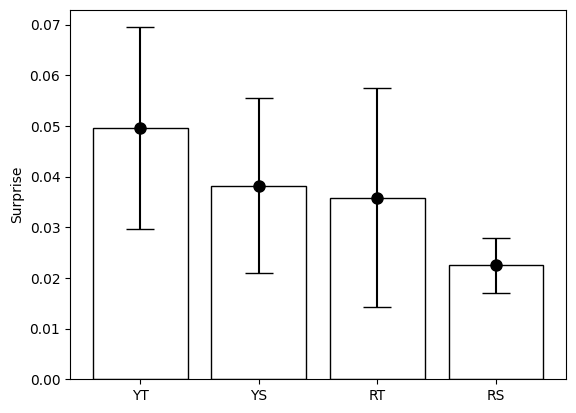

In [25]:
import numpy as np
import statistics

def Average(lst):
    return sum(lst) / len(lst)

sur_YT=[YT_sur,YT45_sur,YT47_sur,YT48_sur,YT50_sur,YT52_sur,YT53_sur,YT54_sur,YT55_sur,YT72_sur]
average_YT = Average(sur_YT)
s1=sem(sur_YT)


sur_YS=[YS_sur,YS45_sur,YS47_sur,YS48_sur,YS50_sur,YS52_sur,YS53_sur,YS54_sur,YS55_sur,YS72_sur]
average_YS = Average(sur_YS)
s2=sem(sur_YS)

sur_RT=[RT_sur,RT45_sur,RT47_sur,RT48_sur,RT50_sur,RT52_sur,RT53_sur,RT54_sur,RT55_sur,RT72_sur]
average_RT = Average(sur_RT)
s3=sem(sur_RT)

sur_RS=[RS_sur,RS45_sur,RS47_sur,RS48_sur,RS50_sur,RS52_sur,RS53_sur,RS54_sur,RS55_sur,RS_sur]
average_RS = Average(sur_RS)
s4=sem(sur_RS)

x=[average_YT,average_YS,average_RT,average_RS]

v1=[0.049528, 0.038242, 0.035866, 0.022468]
thirty=['YT','YS','RT','RS']
s=[0.01995805, 0.01734664, 0.02162023, 0.00548555]
barWidth=0.8

plt.bar(thirty, v1, width = barWidth, color = 'white', edgecolor='black')
plt.errorbar(thirty, v1, yerr = s,fmt='o',ecolor = 'black',color='black', markersize=8, capsize=10)


# # plt.ylim(0,2.5)
plt.ylabel('Surprise')
# # plt.title('Right hook ')


In [26]:
# n2

Text(0, 0.5, 'Valence')

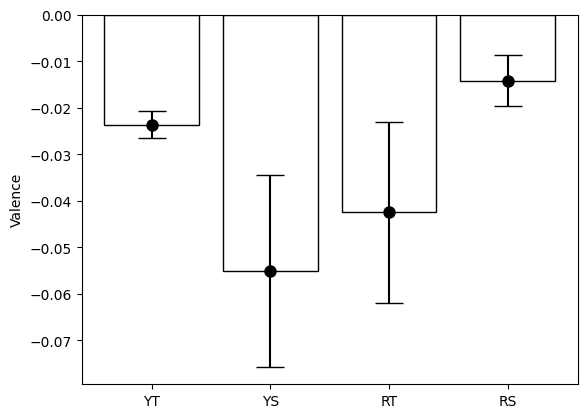

In [27]:
valenc_YT=[YT_val,YT45_val,YT47_val,YT48_val,YT50_val,YT52_val,YT53_val,YT54_val,YT55_val,YT72_val]
vaverage_YT = Average(valenc_YT)
s1v=sem(valenc_YT)


valenc_YS=[YS_val,YS45_val,YS47_val,YS48_val,YS50_val,YS52_val,YS53_val,YS54_val,YS55_val,YS72_val]
vaverage_YS = Average(valenc_YS)
s2v=sem(valenc_YS)


valenc_RT=[RT_val,RT45_val,RT47_val,RT48_val,RT50_val,RT52_val,RT53_val,RT54_val,RT55_val,RT72_val]
vaverage_RT = Average(valenc_RT)
s3v=sem(valenc_RT)


valenc_RS=[RS_val,RS45_val,RS47_val,RS48_val,RS50_val,RS52_val,RS53_val,RS54_val,RS55_val,RS_val]
vaverage_RS = Average(valenc_RS)
s4v=sem(valenc_RS)

n=[vaverage_YT,vaverage_YS,vaverage_RT,vaverage_RS]
n
n2=[s1v,s2v,s3v,s4v]
v=[-0.023624, -0.055049, -0.042473, -0.014211]
s2=[0.002835716, 0.02057526, 0.01944962, 0.005480586]
thirty=['YT','YS','RT','RS']

barWidth=0.8

plt.bar(thirty, v, width = barWidth, color = 'white', edgecolor='black')
plt.errorbar(thirty, v, yerr = s2,fmt='o',ecolor = 'black',color='black', markersize=8, capsize=10)

# plt.ylim(0,2.5)
plt.ylabel('Valence')
# plt.title('Right hook ')


Text(0, 0.5, 'Disgusting')

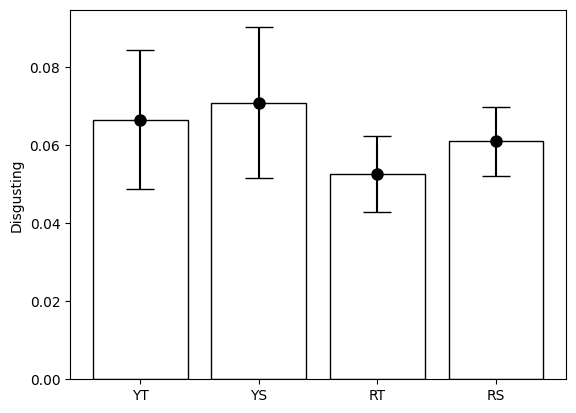

In [28]:
dis_YT=[YT_dis,YT45_dis,YT47_dis,YT48_dis,YT50_dis,YT52_dis,YT53_dis,YT54_dis,YT55_dis,YT72_dis]
daverage_YT = Average(dis_YT)
s1d=sem(dis_YT)


dis_YS=[YS_dis,YS45_dis,YS47_dis,YS48_dis,YS50_dis,YS52_dis,YS53_dis,YS54_dis,YS55_dis,YS72_dis]
daverage_YS = Average(dis_YS)
s2d=sem(dis_YS)


dis_RT=[RT_dis,RT45_dis,RT47_dis,RT48_dis,RT50_dis,RT52_dis,RT53_dis,RT54_dis,RT55_dis,RT72_dis]
daverage_RT = Average(dis_RT)
s3d=sem(dis_RT)


dis_RS=[RS_dis,RS45_dis,RS47_dis,RS48_dis,RS50_dis,RS52_dis,RS53_dis,RS54_dis,RS55_dis,RS_dis]
daverage_RS = Average(dis_RS)
s4d=sem(dis_RS)

n_d=[daverage_YT,daverage_YS,daverage_RT,daverage_RS]
n2_d=[s1d,s2d,s3d,s4d]
n_dis=[0.066479, 0.070839, 0.05256, 0.060926]
s_dis=[0.01781704, 0.01926424, 0.00973082, 0.00882356]
thirty=['YT','YS','RT','RS']

barWidth=0.8

plt.bar(thirty, n_dis, width = barWidth, color = 'white', edgecolor='black')
plt.errorbar(thirty, n_dis, yerr = s_dis,fmt='o',ecolor = 'black',color='black', markersize=8, capsize=10)

# plt.ylim(0,2.5)
plt.ylabel('Disgusting')
# plt.title('Right hook ')


In [29]:
n2_d

[array([0.01781704]),
 array([0.01926424]),
 array([0.00973082]),
 array([0.00882356])]

Text(0, 0.5, 'Arousal')

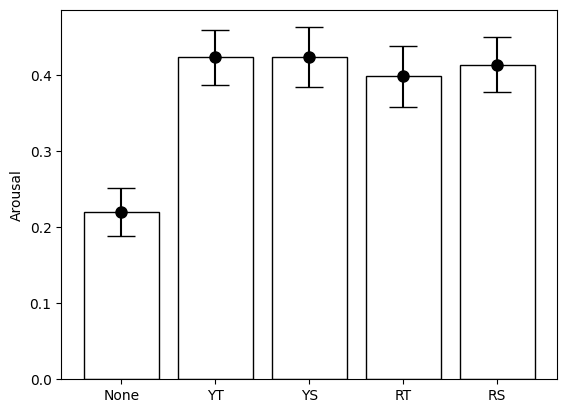

In [30]:
ar_YT=[YT_ar,YT45_ar,YT47_ar,YT48_ar,YT50_ar,YT52_ar,YT53_ar,YT54_ar,YT55_ar,YT72_ar]
aaverage_YT = Average(ar_YT)
s1a=sem(ar_YT)


ar_YS=[YS_ar,YS45_ar,YS47_ar,YS48_ar,YS50_ar,YS52_ar,YS53_ar,YS54_ar,YS55_ar,YS72_ar]
aaverage_YS = Average(ar_YS)
s2a=sem(ar_YS)


ar_RT=[RT_ar,RT45_ar,RT47_ar,RT48_ar,RT50_ar,RT52_ar,RT53_ar,RT54_ar,RT55_ar,RT72_ar]
aaverage_RT = Average(ar_RT)
s3a=sem(ar_RT)


ar_RS=[RS_ar,RS45_ar,RS47_ar,RS48_ar,RS50_ar,RS52_ar,RS53_ar,RS54_ar,RS55_ar,RS_ar]
aaverage_RS = Average(ar_RS)
s4a=sem(ar_RS)

n_a=[aaverage_YT,aaverage_YS,aaverage_RT,aaverage_RS]
n2_a=[s1a,s2a,s3a,s4a]
n_ar=[0.2201,0.42309, 0.423502, 0.398128, 0.413597]
s_ar=[0.03135,0.03610388, 0.03918734, 0.03971556, 0.03604733]
thirty=['None','YT','YS','RT','RS']

barWidth=0.8

plt.bar(thirty, n_ar, width = barWidth, color = 'white', edgecolor='black')
plt.errorbar(thirty, n_ar, yerr = s_ar,fmt='o',ecolor = 'black',color='black', markersize=8, capsize=10)

# plt.ylim(0,2.5)
plt.ylabel('Arousal')
# plt.title('Right hook ')


Text(0, 0.5, 'Angry')

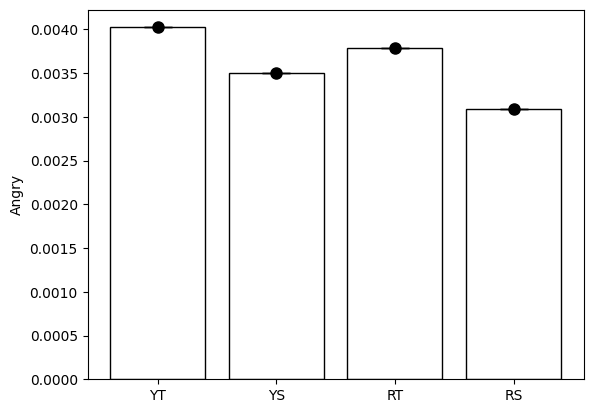

In [321]:
an_YT=[YT_an,YT45_an,YT47_an,YT48_an,YT50_an,YT52_an,YT53_an,YT54_an,YT55_an,YT72_an]
anverage_YT = Average(an_YT)
s1an=sem(an_YT)


an_YS=[YS_an,YS45_an,YS47_an,YS48_an,YS50_an,YS52_an,YS53_an,YS54_an,YS55_an,YS72_an]
anverage_YS = Average(an_YS)
s2an=sem(an_YS)


an_RT=[RT_an,RT45_an,RT47_an,RT48_an,RT50_an,RT52_an,RT53_an,RT54_an,RT55_an,RT72_an]
anverage_RT = Average(an_RT)
s3an=sem(an_RT)


an_RS=[RS_an,RS45_an,RS47_an,RS48_an,RS50_an,RS52_an,RS53_an,RS54_an,RS55_an,RS_an]
anverage_RS = Average(an_RS)
s4an=sem(an_RS)

n_an=[anverage_YT,anverage_YS,anverage_RT,anverage_RS]
s_an=[s1an,s2an,s3an,s4an]
n2_an=[0.004023, 0.0035, 0.003782, 0.003084]
s_an=[0, 1.4456029e-19, 1.4456029e-19, 0]
thirty=['YT','YS','RT','RS']

barWidth=0.8

plt.bar(thirty, n2_an, width = barWidth, color = 'white', edgecolor='black')
plt.errorbar(thirty, n2_an, yerr = s_an,fmt='o',ecolor = 'black',color='black', markersize=8, capsize=10)

# plt.ylim(0,2.5)
plt.ylabel('Angry')
# plt.title('Right hook ')


In [3]:
import matplotlib.image as mpimg



from IPython.display import display
from PIL import Image
path="C:/Users/anika/OneDrive/Desktop/PhD/bicyclist project/results/pic.jpeg"


In [228]:

x_YT = np.array(xa_YT)
y_YT = np.array(ya_YT)

x_YS = np.array(xa_YS)
y_YS = np.array(ya_YS)

x_RT = np.array(xa_RT)
y_RT = np.array(ya_RT)

x_RS = np.array(xa_RS)
y_RS = np.array(ya_RS)



In [263]:
path2="C:/Users/anika/OneDrive/Desktop/PhD/bicyclist project/results/vids/front_collision.jpg"
path3="C:/Users/anika/OneDrive/Desktop/PhD/bicyclist project/results/vids/right_hook.jpg"
img2 = mpimg.imread(path2)
img3 = mpimg.imread(path3)



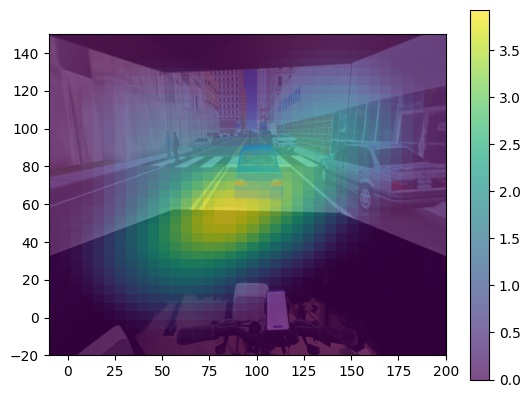

In [267]:
import math
x=xa_YT
y=ya_YT
grid_size=1
h=10
#GETTING X,Y MIN AND MAX
x_min=min(x_YT)
x_max=max(x_YT)
y_min=min(y_YT)
y_max=max(y_YT)

#CONSTRUCT GRID
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np.arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)
#GRID CENTER POINT
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

intensity_list=[]
for j in range(len(xc)):
    intensity_row=[]
    for k in range(len(xc[0])):
        kde_value_list=[]
        for i in range(len(x)):
            #CALCULATE DISTANCE
            d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y_YT[i])**2) 
            if d<=h:
                p=kde_quartic(d,h)
            else:
                p=0
            kde_value_list.append(p)
        #SUM ALL INTENSITY VALUE
        p_total=sum(kde_value_list)
        intensity_row.append(p_total)
    intensity_list.append(intensity_row)


#ax.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT, linestyle="-")

intensity=np.array(intensity_list)
#plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT,'ro')
#plt.colorbar()
#plt.show()

plt.imshow(img2, extent=[-10, 200, -20, 150])
#plt.imshow(img, extent=[x_min-h, x_max+h, y_min-h, y_max+h])
# Overlay the heatmap on top of the custom background
#plt.imshow(intensity, extent=[x_min-h, x_max+h, y_min-h, y_max+h], alpha=0.3)
plt.imshow(intensity, extent=[-10, 200, -20, 150], alpha=0.7)



# Plot the data points
#plt.plot(x_YT, y_YT, 'ro')
plt.colorbar()
plt.show()

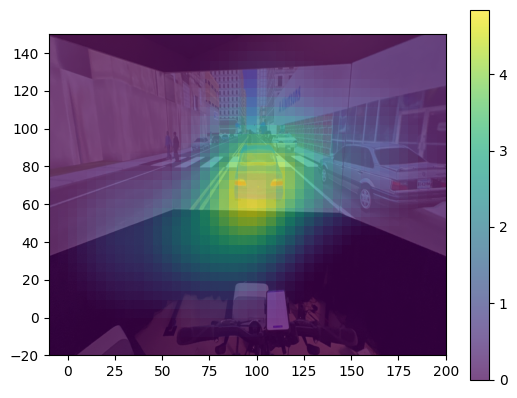

In [294]:
grid_size=1
h1=10
x1=x_YS
y1=y_YS
#GETTING X,Y MIN AND MAX
x_min1=min(x_YS)
x_max1=max(x_YS)
y_min1=min(y_YS)
y_max1=max(y_YS)

#CONSTRUCT GRID
x_grid1=np.arange(x_min1-h1,x_max1+h,grid_size)
y_grid1=np.arange(y_min1-h1,y_max1+h,grid_size)
x_mesh1,y_mesh1=np.meshgrid(x_grid1,y_grid1)
#GRID CENTER POINT
xc1=x_mesh1+(grid_size/2)
yc1=y_mesh1+(grid_size/2)
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

intensity_list1=[]
for j1 in range(len(xc1)):
    intensity_row1=[]
    for k1 in range(len(xc1[0])):
        kde_value_list1=[]
        for i1 in range(len(x1)):
            #CALCULATE DISTANCE
            d1=math.sqrt((xc1[j1][k1]-x1[i1])**2+(yc1[j1][k1]-y_YS[i1])**2) 
            if d1<=h1:
                p1=kde_quartic(d1,h1)
            else:
                p1=0
            kde_value_list1.append(p1)
        #SUM ALL INTENSITY VALUE
        p_total1=sum(kde_value_list1)
        intensity_row1.append(p_total1)
    intensity_list1.append(intensity_row1)


#ax.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT, linestyle="-")

intensity1=np.array(intensity_list1)
#plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT,'ro')
#plt.colorbar()
#plt.show()

#plt.imshow(img2, extent=[-10, 200, -50, 100])
#plt.imshow(img, extent=[x_min-h, x_max+h, y_min-h, y_max+h])
# Overlay the heatmap on top of the custom background
#plt.imshow(intensity, extent=[x_min-h, x_max+h, y_min-h, y_max+h], alpha=0.3)
plt.imshow(img2, extent=[-10, 200, -20, 150])
#plt.imshow(intensity1, extent=[-10, 200, -20, 150], alpha=0.7)


plt.imshow(intensity1, extent=[-10, 200, -20, 150], alpha=0.7)


# Plot the data points
#plt.plot(x_YT, y_YT, 'ro')
plt.colorbar()
plt.show()

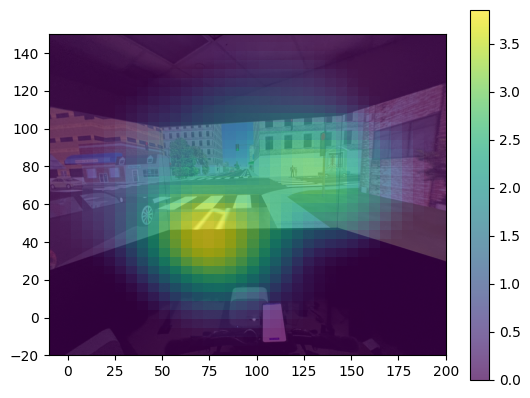

In [295]:
grid_size=1
h2=10
x2=x_RS
y2=y_RS
#GETTING X,Y MIN AND MAX
x_min2=min(x_RS)
x_max2=max(x_RS)
y_min2=min(y_RS)
y_max2=max(y_RS)

#CONSTRUCT GRID
x_grid2=np.arange(x_min2-h2,x_max2+h2,grid_size)
y_grid2=np.arange(y_min2-h2,y_max2+h2,grid_size)
x_mesh2,y_mesh2=np.meshgrid(x_grid2,y_grid2)
#GRID CENTER POINT
xc2=x_mesh2+(grid_size/2)
yc2=y_mesh2+(grid_size/2)
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

intensity_list2=[]
for j2 in range(len(xc2)):
    intensity_row2=[]
    for k2 in range(len(xc2[0])):
        kde_value_list2=[]
        for i2 in range(len(x2)):
            #CALCULATE DISTANCE
            d2=math.sqrt((xc2[j2][k2]-x2[i2])**2+(yc2[j2][k2]-y_RS[i2])**2) 
            if d2<=h2:
                p2=kde_quartic(d2,h2)
            else:
                p2=0
            kde_value_list2.append(p2)
        #SUM ALL INTENSITY VALUE
        p_total2=sum(kde_value_list2)
        intensity_row2.append(p_total2)
    intensity_list2.append(intensity_row2)


#ax.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT, linestyle="-")

intensity2=np.array(intensity_list2)
#plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT,'ro')
#plt.colorbar()
#plt.show()

plt.imshow(img3, extent=[-10, 200, -20, 150])
#plt.imshow(img, extent=[x_min-h, x_max+h, y_min-h, y_max+h])
# Overlay the heatmap on top of the custom background
#plt.imshow(intensity, extent=[x_min-h, x_max+h, y_min-h, y_max+h], alpha=0.3)
plt.imshow(intensity2, extent=[-10, 200, -20, 150], alpha=0.7)


# Plot the data points
#plt.plot(x_YT, y_YT, 'ro')
plt.colorbar()
plt.show()

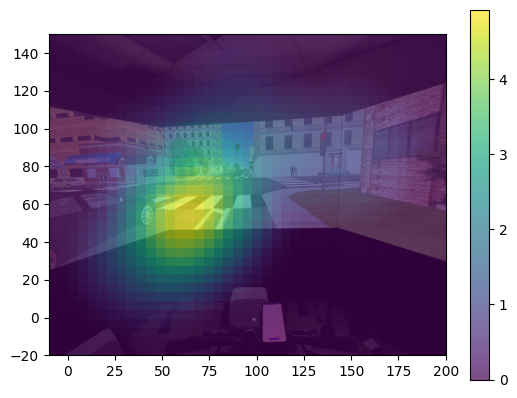

In [266]:
grid_size=1
h3=10
x3=x_RT
y3=y_RT
#GETTING X,Y MIN AND MAX
x_min3=min(x_RT)
x_max3=max(x_RT)
y_min3=min(y_RT)
y_max3=max(y_RT)

#CONSTRUCT GRID
x_grid3=np.arange(x_min3-h3,x_max3+h3,grid_size)
y_grid3=np.arange(y_min3-h3,y_max3+h3,grid_size)
x_mesh3,y_mesh3=np.meshgrid(x_grid3,y_grid3)
#GRID CENTER POINT
xc3=x_mesh3+(grid_size/2)
yc3=y_mesh3+(grid_size/2)
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P

intensity_list3=[]
for j3 in range(len(xc3)):
    intensity_row3=[]
    for k3 in range(len(xc3[0])):
        kde_value_list3=[]
        for i3 in range(len(x3)):
            #CALCULATE DISTANCE
            d3=math.sqrt((xc3[j3][k3]-x3[i3])**2+(yc3[j3][k3]-y_RT[i3])**2) 
            if d3<=h3:
                p3=kde_quartic(d3,h3)
            else:
                p3=0
            kde_value_list3.append(p3)
        #SUM ALL INTENSITY VALUE
        p_total3=sum(kde_value_list3)
        intensity_row3.append(p_total3)
    intensity_list3.append(intensity_row3)


#ax.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT, linestyle="-")

intensity3=np.array(intensity_list3)
#plt.pcolormesh(x_mesh,y_mesh,intensity)
#plt.imshow(img, extent=[-200, 200, -40, 300])
#ax.plot(x_YT, y_YT,'ro')
#plt.colorbar()
#plt.show()

plt.imshow(img3, extent=[-10, 200, -20, 150])
#plt.imshow(img, extent=[x_min-h, x_max+h, y_min-h, y_max+h])
# Overlay the heatmap on top of the custom background
#plt.imshow(intensity, extent=[x_min-h, x_max+h, y_min-h, y_max+h], alpha=0.3)
plt.imshow(intensity3, extent=[-10, 200, -20, 150], alpha=0.7)


# Plot the data points
#plt.plot(x_YT, y_YT, 'ro')
plt.colorbar()
plt.show()

In [328]:
vertical_stack = pd.concat([df_44, df_45, df_47, df_48, df_50, df_52, df_53, df_54, df_55, df_72], axis=0)

vertical_stack

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Pitch,Yaw,Roll,Quality,Mouth,Left Eye,Right Eye,Left Eyebrow,Right Eyebrow,Gaze Direction,Horizontal position,Vertical position,Depth position,Horizontal gaze angle,Vertical gaze angle,Type,Time,Speed,Traffic_volume,Warning,Gender,Unnamed: 31,average horizontal,average vertical,Collision,Reaction_Time,Max_v,Ave_v
0,01:12.0,0.9209794,0.06635344,0.04589145,0.002163734,0.01107026,0.02270168,0.01731,0.020462,0.3335958,13.98113,2.345486,-4.261234,0.6381086,Closed,Open,Open,Neutral,Neutral,Forward,-7.919467,48.38997,707.6608,9.494688,14.78506,Right,Night,45 mph,Light,RS,Male,NaN,-1.224834,51.484670,NaN,NaN,NaN,NaN
1,01:12.0,0.9228525,0.06506289,0.04384602,0.002096908,0.01131836,0.02147914,0.01745745,0.02121687,0.3329415,14.08681,2.139868,-4.319109,0.6327028,Closed,Open,Open,Neutral,Neutral,Forward,-9.453105,49.12967,708.1113,4.795661,15.29157,Right,Night,46 mph,Light,RS,Male,NaN,27.660606,46.563112,NaN,NaN,NaN,NaN
2,01:12.0,0.9251881,0.0660933,0.0417241,0.002190355,0.01088057,0.02000542,0.01985244,0.02436919,0.3322526,13.81242,2.031785,-4.456828,0.6266775,Closed,Open,Open,Neutral,Neutral,Left,-9.979665,48.61899,702.306,10.56143,17.01278,Right,Night,47 mph,Light,RS,Male,NaN,28.958804,43.216149,NaN,NaN,NaN,NaN
3,01:12.1,0.9255266,0.06483744,0.04370604,0.002183409,0.01019692,0.01846076,0.02658005,0.0211314,0.3314877,13.36858,2.296108,-4.712716,0.6290064,Closed,Open,Open,Neutral,Neutral,Forward,-10.65641,49.53471,702.4934,6.077894,13.77642,Right,Night,48 mph,Light,RS,Male,NaN,15.493976,41.537796,NaN,NaN,NaN,NaN
4,01:12.1,0.9292166,0.06284843,0.04318818,0.00209195,0.009502278,0.01722853,0.02584389,0.01966026,0.3306874,13.50923,1.772851,-3.298296,0.6238626,Closed,Open,Open,Neutral,Neutral,Forward,-12.12183,49.93031,701.975,5.204954,12.86595,Right,Night,49 mph,Light,RS,Male,NaN,27.869301,46.219582,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,15:08.8,0.586672,0.007928,0.002324,0.001813,0.386159,0.071678,0.000881,-0.063749,0.355724,16.10006,2.247985,4.218037,0.680734,Closed,Open,Open,Neutral,Neutral,Left - Down,26.3175,26.8977,1107.265,27.93067,2.397895,Right,Day,130 mph,Light,RS,Female,NaN,NaN,NaN,no,2.39,9.0,5.730769
1434,15:08.8,0.597541,0.007343,0.002582,0.001722,0.368621,0.067599,0.000996,-0.060256,0.355573,16.03474,2.302298,4.332959,0.688445,Closed,Open,Open,Neutral,Neutral,Left - Down,27.66291,27.72145,1112.97,24.83986,1.396506,Right,Day,131 mph,Light,RS,Female,NaN,NaN,NaN,no,2.39,9.0,5.730769
1435,15:08.9,0.61195,0.007132,0.002791,0.001654,0.359554,0.065748,0.001031,-0.058616,0.355423,16.10192,3.135607,3.837437,0.666825,Closed,Open,Open,Neutral,Neutral,Left - Down,27.64467,28.03932,1119.007,26.81002,2.45657,Right,Day,132 mph,Light,RS,Female,NaN,NaN,NaN,no,2.39,9.0,5.730769
1436,15:08.9,0.621946,0.007382,0.002806,0.00159,0.351647,0.063209,0.001055,-0.055827,0.355295,16.22631,2.841726,3.787437,0.676325,Closed,Open,Open,Neutral,Neutral,Left - Down,27.34096,27.52497,1117.624,23.96594,-3.827712,Right,Day,133 mph,Light,RS,Female,NaN,NaN,NaN,no,2.39,9.0,5.730769


In [342]:
import scipy.stats as stats

group1=vertical_stack.loc[vertical_stack['Warning']=='YT']
group2=vertical_stack.loc[vertical_stack['Warning']=='YS']
group3=vertical_stack.loc[vertical_stack['Warning']=='RT']
group4=vertical_stack.loc[vertical_stack['Warning']=='RS']
#f_value, p_value = stats.f_oneway(group1, group2, group3,group4)
#p_value 

In [340]:
group2

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal,Pitch,Yaw,Roll,Quality,Mouth,Left Eye,Right Eye,Left Eyebrow,Right Eyebrow,Gaze Direction,Horizontal position,Vertical position,Depth position,Horizontal gaze angle,Vertical gaze angle,Type,Time,Speed,Traffic_volume,Warning,Gender,Unnamed: 31,average horizontal,average vertical,Collision,Reaction_Time,Max_v,Ave_v
